In [72]:
import pandas as pd
from fbprophet import Prophet
import numpy as np
import matplotlib.pyplot as plt          
%matplotlib inline

f = pd.read_csv('hist.csv')
keep_col = ['date','close'] ## keep only date and closing price
new_f = f[keep_col]
new_f.to_csv("mod_hist.csv", index=False) 

## Plotting historical Bitcoin price data from Coin Market Cap

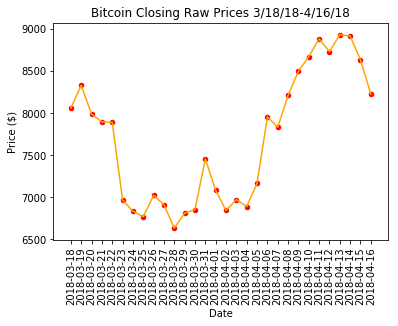

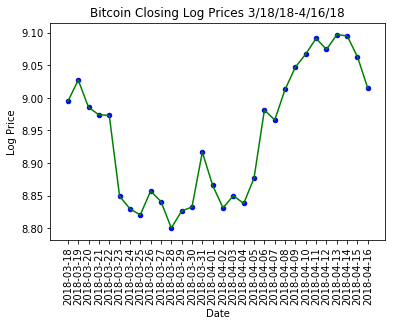

In [79]:
df = pd.read_csv('mod_hist.csv',nrows=30)
df.columns = ['ds','y']
df['log'] = np.log(df.y) 
df.head(30)
df["ds"] = df["ds"].values[::-1] #for some reason dates were printing in reverse order
# Plot raw price
plt.plot(df.ds,df.y,color='orange')
plt.scatter(df.ds,df.y,s=20,color='red')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Price ($)')
plt.title('Bitcoin Closing Raw Prices 3/18/18-4/16/18')
plt.show()
# Plot log price
plt.plot(df.ds,df.log,color='green')
plt.scatter(df.ds,df.log,s=20,color='blue')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Log Price')
plt.title('Bitcoin Closing Log Prices 3/18/18-4/16/18')
plt.show()

## Prophet Bitcoin price data forecast

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


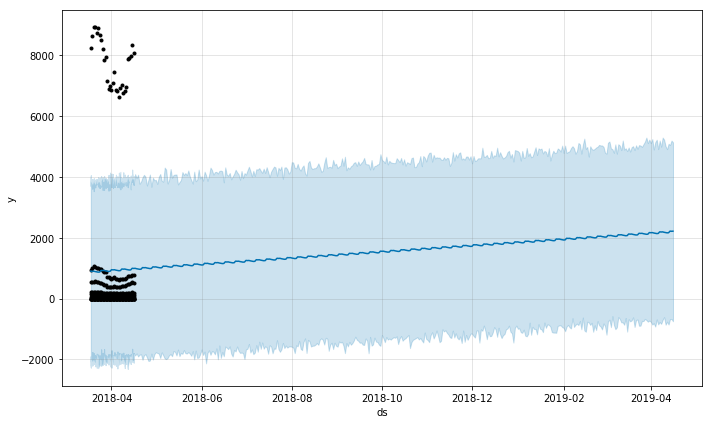

In [17]:
df = pd.read_csv('mod_hist.csv')
df.columns = ['ds','y'] #rename columns
df.head()

m = Prophet()
m.fit(df)

future = m.make_future_dataframe(periods=365) #1 year out
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig = m.plot(forecast)


## Kurtosis & Skew

In [20]:
df.y.kurtosis()

5.461023151750293

A kurtosis this high (well above 3) means that there are more outliers than in a normal distribution, which is obvious from the graph, and makes sense.

In [19]:
df.y.skew()

2.6792844839160272

A skew > 0 means that the graph is asymmetric with a tail on the right.

# # Saturating the Forecast

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


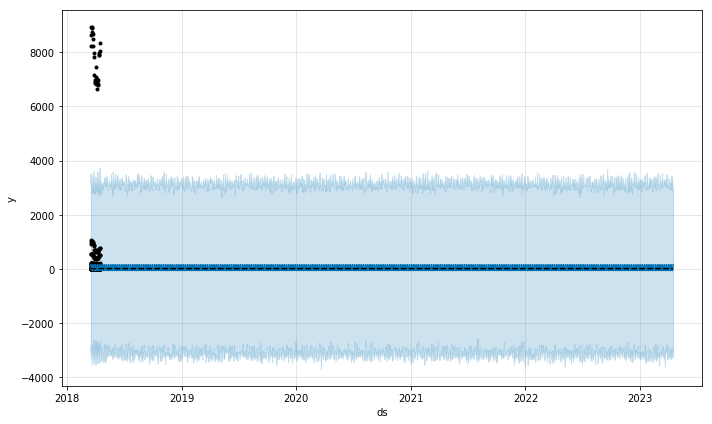

In [21]:
df['cap'] = 8.5 # assuming the carying capacity
m = Prophet(growth='logistic')
m.fit(df)

# Forecast
future = m.make_future_dataframe(periods=1826) #1 year forecast
future['cap'] = 10 #increase carryig capacity
fcst = m.predict(future)
fig = m.plot(fcst)